<a href="https://colab.research.google.com/github/venukashoju/ML/blob/main/Amazon_Product_Review_Sentiment_Analysis_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout,Embedding,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20240828174000/Amazon-Product-Review-Sentiment-Analysis-using-RNN-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.isna().sum()
df = df.dropna()
df.isna().sum()

,0
Review,0
Sentiment,0


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,5000
2,5000
3,5000
4,5000
5,4999


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
def clean_reviews(text):
    regex = re.compile('<.*?>')
    text = re.sub(regex, '', text)
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern,'',text)
    pattern = re.compile('\d+')
    text = re.sub(pattern,'',text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if not word in stop_words]
    return text
df['Review'] = df['Review'].apply(clean_reviews)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokenizer = Tokenizer()
reviews_to_list = df['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)
maxwords = 500
padded_sequences = pad_sequences(text_sequences,maxlen=maxwords)
text_sequences = np.array(padded_sequences)
df = pd.get_dummies(df, columns = ['Sentiment'])
X = pad_sequences(text_sequences, maxlen = maxwords)
y = df[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4','Sentiment_5']]
print(X.shape, y.shape)

(24999, 500) (24999, 5)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19999, 500) (5000, 500) (19999, 5) (5000, 5)


In [ ]:
rnn = Sequential(name = 'Simple_RNN')
rnn.add(Embedding(len(tokenizer.word_index)+1,maxwords,input_length=maxwords))
rnn.add(SimpleRNN(128,activation='relu',return_sequences=True))
rnn.add(SimpleRNN(4,activation='relu',return_sequences=False))
rnn.add(Dense(5,activation='softmax'))
print(rnn.summary())

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
rnn.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = rnn.fit(X_train,y_train,batch_size=32,epochs=4,verbose=1,validation_data=(X_test,y_test))
print("Simple_RNN Score---> ", rnn.evaluate(X_test, y_test, verbose=1))

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.2211 - loss: 1.6099 - val_accuracy: 0.3400 - val_loss: 1.4870
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.3995 - loss: 1.3607 - val_accuracy: 0.4270 - val_loss: 1.3013
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.5312 - loss: 1.0651 - val_accuracy: 0.4308 - val_loss: 1.3200
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 666s 1s/step - accuracy: 0.6305 - loss: 0.8572 - val_accuracy: 0.4094 - val_loss: 1.4581
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.4082 - loss: 1.4549
Simple_RNN Score--->  [1.4581056833267212, 0.40939998626708984]


In [ ]:
model = Sequential(name = 'LSTM')
model.add(Embedding(len(tokenizer.word_index)+1, maxwords, input_length=maxwords))
model.add(LSTM(150,return_sequences=False))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
print(model.summary())

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train,batch_size=64,epochs=3,verbose=1,validation_data=(X_test, y_test))
print("LSTM_Score---> ", model.evaluate(X_test, y_test, verbose=1))

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 961s 3s/step - accuracy: 0.3165 - loss: 1.4838 - val_accuracy: 0.4652 - val_loss: 1.2273
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 982s 3s/step - accuracy: 0.5223 - loss: 1.1136 - val_accuracy: 0.4730 - val_loss: 1.2433
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 1018s 3s/step - accuracy: 0.6393 - loss: 0.9021 - val_accuracy: 0.4552 - val_loss: 1.3304
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 479ms/step - accuracy: 0.4496 - loss: 1.3399
LSTM_Score--->  [1.3304109573364258, 0.4551999866962433]


Text(0, 0.5, 'Accuracy')

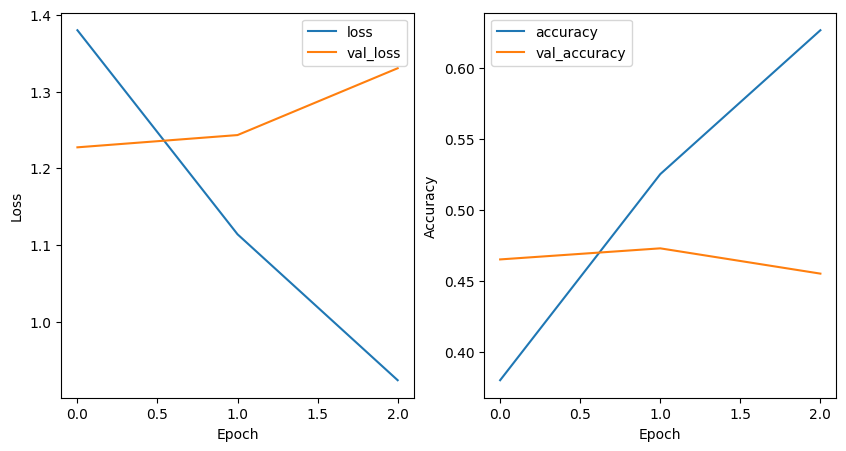

In [13]:
metrics = history.history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'],metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 521ms/step
tf.Tensor(
[[585 247 104  49  36]
 [279 322 238  95  66]
 [110 216 344 235  80]
 [ 44  62 180 467 220]
 [ 40  36  91 296 558]], shape=(5, 5), dtype=int32)


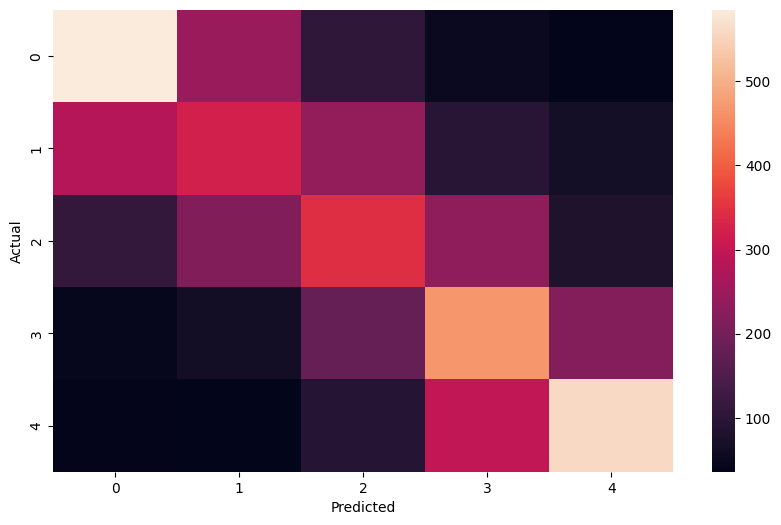

In [17]:
import seaborn as sns
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = tf.math.confusion_matrix(y_true, y_pred)
print(cm)
plt.figure(figsize = (10,6))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1021
           1       0.36      0.32      0.34      1000
           2       0.36      0.35      0.35       985
           3       0.41      0.48      0.44       973
           4       0.58      0.55      0.56      1021

    accuracy                           0.46      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.46      0.45      5000



In [23]:
def predict_review_rating(text):
  text_sequences_test = np.array(tokenizer.texts_to_sequences([text]))
  testing = pad_sequences(text_sequences_test, maxlen = maxwords)
  y_pred_test = np.argmax(model.predict(testing), axis=1)
  return y_pred_test[0]+1
rating1 = predict_review_rating('Quality is Bad. Dont Buy ')
print("The rating according to the review is: ", rating1)
rating2 = predict_review_rating('Awesome!Worth of Buying. Good Product')
print("The rating according to the review is: ", rating2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
The rating according to the review is:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
The rating according to the review is:  5
